## TCD Id : 19316970

In [703]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Loading all essential libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.a

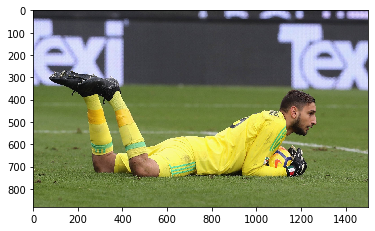

In [705]:
#Reading an image
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/goalkeeper.jpg')
#Converting BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#To display the image in RGB
plt.imshow(img)
plt.show()

## 1.b

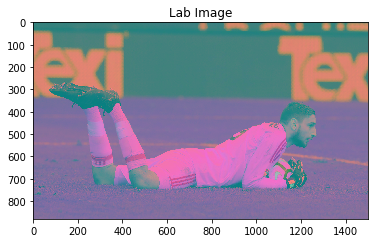

In [706]:
#Converting RGB to LAB
Lab=cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
#To display the image in LAB
plt.title('Lab Image')
plt.imshow(Lab)
plt.show()
#Splitting LAB constituents to L,a,b
L,a,b=cv2.split(Lab)

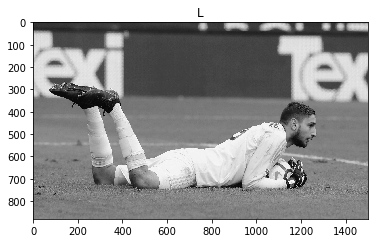

In [707]:
#To display Luminance component(L) of the image
plt.title('L')
plt.imshow(L,cmap='gray')
plt.show()

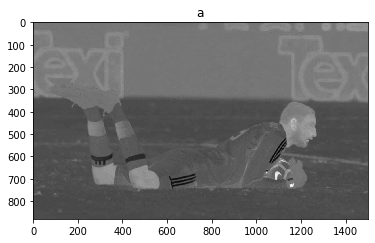

In [708]:
#To display Chrominance component(a) of the image
plt.title('a')
plt.imshow(a,cmap='gray')
plt.show()

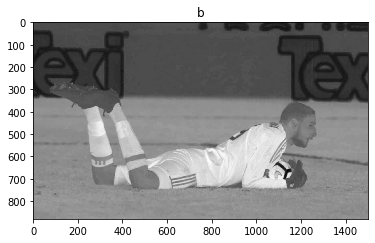

In [709]:
#To display Chrominance component(b) of the image
plt.title('b')
plt.imshow(b,cmap='gray')
plt.show()

## 1.c

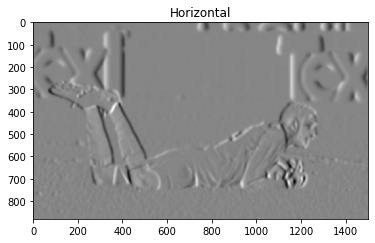

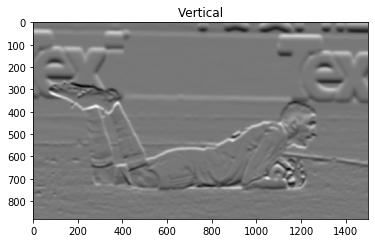

In [710]:
#Importing filters from scipy library
from scipy.ndimage import filters
sigma = 5 #standard deviation
#Computing the spatial derivatives of the luminance component L in the horizontal direction using convolution by the derivatives of Gaussian filter
img_x_horiz = np.zeros(L.shape)
filters.gaussian_filter(L, (sigma,sigma), (0,1), img_x_horiz)
#Computing the spatial derivatives of the luminance component L in the vertical direction using convolution by the derivatives of Gaussian filter
img_y_verti = np.zeros(L.shape)
filters.gaussian_filter(L, (sigma,sigma), (1,0), img_y_verti)
#Displaying L component in horizontal direction
plt.title('Horizontal')
plt.imshow(img_x_horiz,cmap='gray')
plt.show()
#Displaying L component in vertical direction
plt.title('Vertical')
plt.imshow(img_y_verti,cmap='gray')
plt.show()

## 1.d

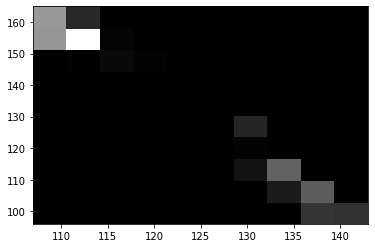

In [711]:
#2D Histogram of Chrominance components(a,b)
a=np.asarray(a)[:,0]
b=np.asarray(b)[:,1]
plt.hist2d(a,b,density=True,cmap='gray')
plt.show()

## 1.e

In [0]:
obj = cv2.imread("/content/drive/My Drive/Colab Notebooks/pitch_ground.jpg")
lab_obj = cv2.cvtColor(obj, cv2.COLOR_BGR2LAB)
# # Histogram Obj
obj_hist = cv2.calcHist([lab_obj], [1, 2], None, [180, 256], [0, 180, 0, 256])
mask = cv2.calcBackProject([Lab], [1, 2], obj_hist, [0, 180, 0, 256], 1)
# # Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)
mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(img, mask)

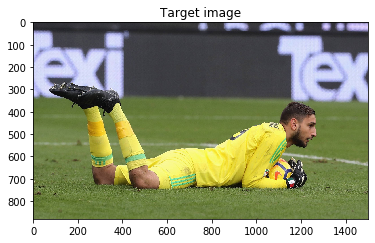

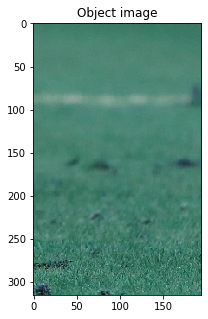

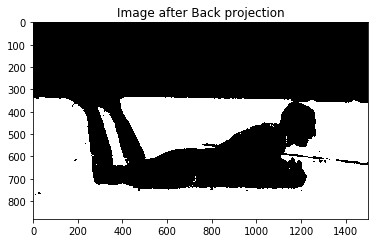

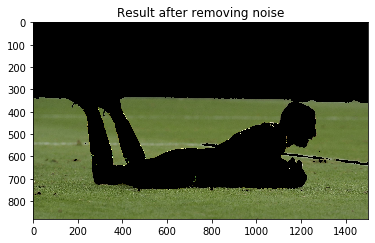

In [713]:
plt.title("Target image")
plt.imshow(img)
plt.figure(figsize=(5,5))
plt.title("Object image")
plt.imshow(obj)
plt.show()
plt.title("Image after Back projection")
plt.imshow(mask)
plt.show()
plt.title('Result after removing noise')
plt.imshow(result)
plt.show()

## 1.f

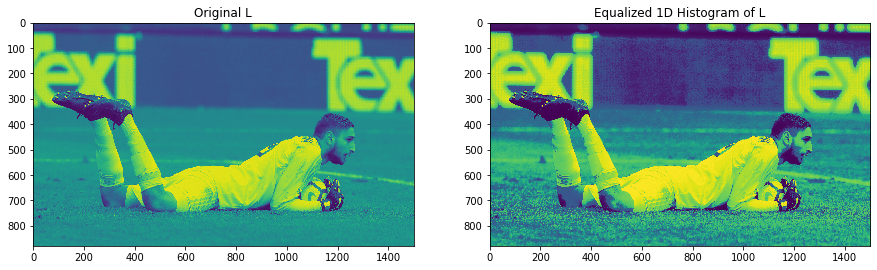

In [714]:
#Histogram equalization using 1D Histogram on Luminance(L)
equ = cv2.equalizeHist(L)
plt.figure(figsize=(15,15))
plt.subplot(121,)
plt.title("Original L")
plt.imshow(L,)
plt.subplot(122)
plt.title("Equalized 1D Histogram of L")
plt.imshow(equ)
plt.show()

## 1.g Evaluate the performance of these techniques with histograms (i.e. illustrate when it works, and when it does not work).

Answer : As per my observation these histograms don't provide perfect results in case of image with lot of information. To explain my observation better I will perform the above mentioned techniques on a Color Explosion image (taken from google) to confirm it doesn't provide as good result as it does in case of images with specific objects, i.e images that have objects to identify. 

For images with lot of clustured data on them these methods wont work.

For example "Color explosion image has lot of colors and has no particular object to identify" where as "goalkeeper image(also taken from a site in google) has a speciic object to identify and edges of the object are reconstructed sharply, I notice major difference in performance of these histograms when gaussian filter and back projection is applied. 

Adding to the above point, I also noticed that when I manually select a part of the image (object image) for back projection I dont receive perfect result as seen below. While when I cropped a image and used that instead,I got perfect result as seen above.

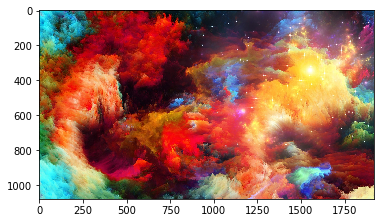

In [715]:
test_img=cv2.imread('/content/drive/My Drive/Computer Vision/Color_Explosion.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

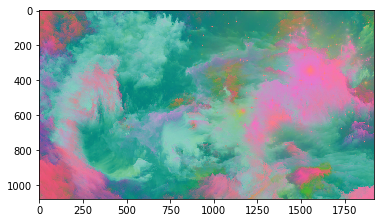

In [716]:
#Converting RGB to LAB
Lab=cv2.cvtColor(test_img,cv2.COLOR_RGB2LAB)
#To display the image in LAB
plt.imshow(Lab)
plt.show()
#Splitting LAB constituents
L,a,b=cv2.split(Lab)

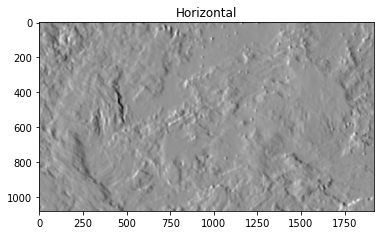

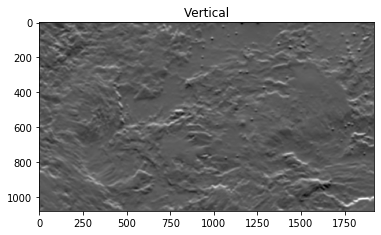

In [717]:
#Importing filters from scipy library
from scipy.ndimage import filters
sigma = 5 #standard deviation
#Computing the spatial derivatives of the luminance component L in the horizontal direction using convolution by the derivatives of Gaussian filter
img_x_horiz = np.zeros(L.shape)
filters.gaussian_filter(L, (sigma,sigma), (0,1), img_x_horiz)
#Computing the spatial derivatives of the luminance component L in the vertical direction using convolution by the derivatives of Gaussian filter
img_y_verti = np.zeros(L.shape)
filters.gaussian_filter(L, (sigma,sigma), (1,0), img_y_verti)
#Displaying L component in horizontal direction
plt.title('Horizontal')
plt.imshow(img_x_horiz,cmap='gray')
plt.show()
#Displaying L component in vertical direction
plt.title('Vertical')
plt.imshow(img_y_verti,cmap='gray')
plt.show()

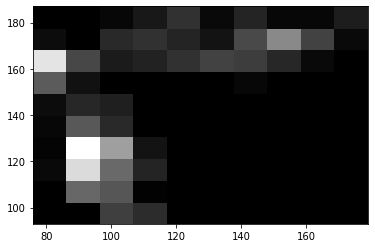

In [718]:
#2D Histogram of Chrominance components(a,b)
a=np.asarray(a)[:,0]
b=np.asarray(b)[:,1]
plt.hist2d(a,b,density=True,cmap='gray')
plt.show()

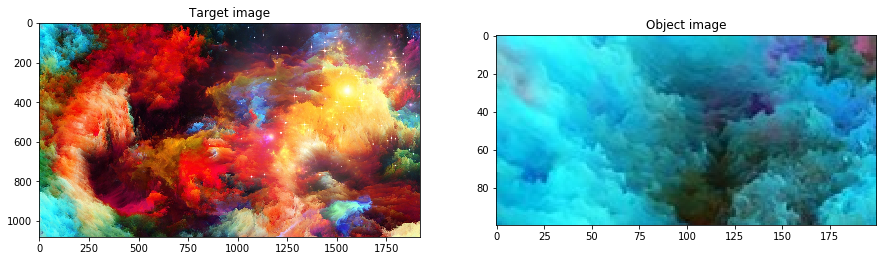

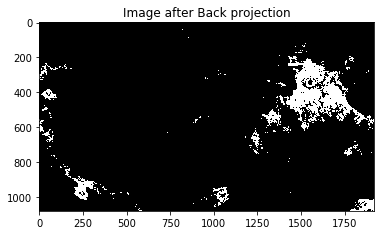

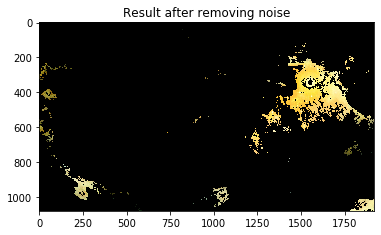

In [719]:
y=0
x=0
h=100
w=200
obj_test = test_img[y:y+h, x:x+w]
lab_obj = cv2.cvtColor(obj_test, cv2.COLOR_BGR2LAB)
# # Histogram Obj
obj_hist = cv2.calcHist([lab_obj], [1, 2], None, [180, 256], [0, 180, 0, 256])
mask = cv2.calcBackProject([Lab], [1, 2], obj_hist, [0, 180, 0, 256], 1)
# # Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)
mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(test_img, mask)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.title("Target image")
plt.imshow(test_img)
plt.subplot(122)
plt.title("Object image")
plt.imshow(obj_test)
plt.show()
plt.title("Image after Back projection")
plt.imshow(mask)
plt.show()
plt.title('Result after removing noise')
plt.imshow(result)
plt.show()

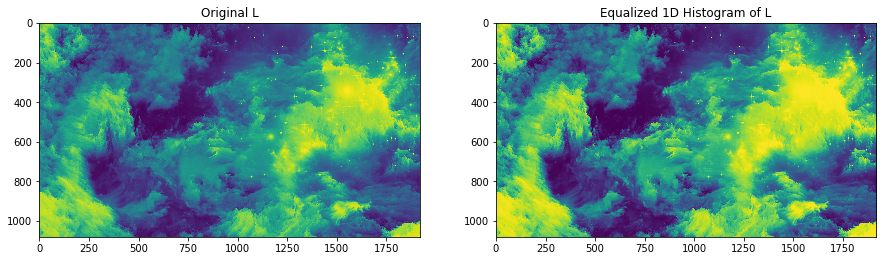

In [720]:
#Histogram equalization using 1D Histogram on Luminance(L)
equ = cv2.equalizeHist(L)
plt.figure(figsize=(15,15))
plt.subplot(121,)
plt.title("Original L")
plt.imshow(L,)
plt.subplot(122)
plt.title("Equalized 1D Histogram of L")
plt.imshow(equ)
plt.show()

## Question 2

In [0]:
#Loading the mnist dataframe in csv format
mnist_df_train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist-in-csv/mnist_train.csv')

In [0]:
#Separating label and pixels from the data set
label_train=mnist_df_train['label']
pixels_train=mnist_df_train.drop('label',axis=1)

## 2.a

In [0]:
#Separating all label=1 from the data set
mnist_pixels_1=pixels_train[mnist_df_train['label']==1]

In [0]:
#Importing PCA(Principal Compoenet Analysis) from sklearn
from sklearn.decomposition import PCA

In [725]:
#Applying PCA on dataset of all 1's
pca= PCA()
pca_train=pca.fit_transform(mnist_pixels_1)
print(pca_train.shape)
principalComponents=pca.components_

(6742, 784)


In [0]:
#Finding the mean image of 1
mean_img=pca.mean_

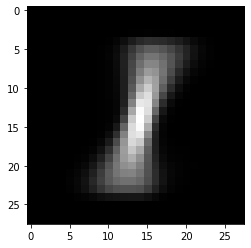

In [727]:
#Plotting mean_img of 1 in grayscale
plt.imshow(mean_img.reshape(28,28),cmap='gray')

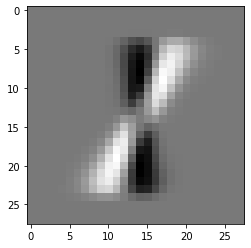

In [728]:
#Displaying 1st image of 1 with highest egienvalue
plt.imshow(principalComponents[0].reshape(28,28),cmap='gray')

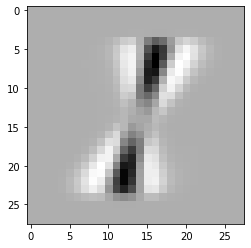

In [729]:
#Displaying 2nd image of 1 with 2nd highest egienvalue
plt.imshow(principalComponents[1].reshape(28,28),cmap='gray')

## 2.b

In [0]:
#Loading the mnist testing data set in csv format
mnist_df_test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist-in-csv/mnist_test.csv')

In [0]:
#Separating Labels and pixels from test data set
label_test=mnist_df_test['label']
pixels_test=mnist_df_test.drop('label',axis=1)

In [0]:
#Separating all 1's from test datdset
mnist_pixels_1_test=pixels_test[mnist_df_test['label']==1]

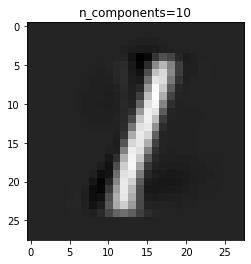

In [733]:
#Applying PCA on 10 Components and plotting the image with 10 components
pca10= PCA(n_components=10)
pca_train10=pca10.fit_transform(mnist_pixels_1)
pca_test10=pca10.transform(mnist_pixels_1_test)
img_recons=pca10.inverse_transform(pca_test10)
plt.title('n_components=10')
plt.imshow(img_recons[1].reshape(28,28),cmap='gray')
plt.show()

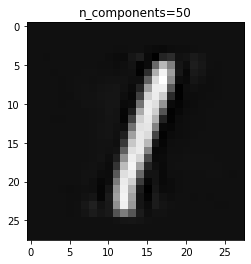

In [734]:
#Applying PCA on 50 Components and plotting the image with 50 components
pca50= PCA(n_components=50)
pca_train50=pca50.fit_transform(mnist_pixels_1)
pca_test50=pca50.transform(mnist_pixels_1_test)
img_recons=pca50.inverse_transform(pca_test50)
plt.title('n_components=50')
plt.imshow(img_recons[1].reshape(28,28),cmap='gray')
plt.show()

## 2.c SSD

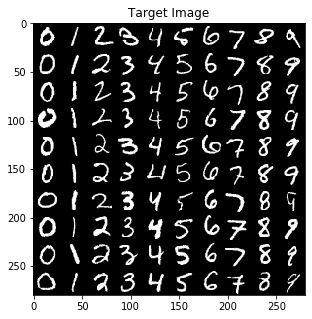

In [735]:
#Creating and target image of 10 rows and 10 columns
nums=range(10)
num_list=np.zeros((280,280))
j=0
for i in nums:
  num_list[:,j:j+28]=np.array(mnist_df_test[mnist_df_test['label']==i].drop('label',axis=1).head(10)).reshape(280,28)
  j=j+28
num_list

#Plotting the target image
plt.figure(figsize=[5,5])
plt.title('Target Image')
plt.imshow(np.array(num_list).reshape(280,280),cmap='gray')
plt.show()

In [0]:
#Function to find the Sum of squared Difference
def ssd(A,B):
    squares = (A - B) ** 2
    return np.sum(squares)

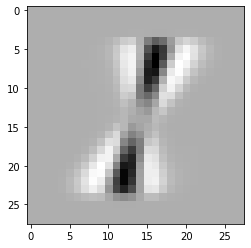

In [737]:
#Take the object image using PCA for calculating SSD
pca= PCA()
pca_train=pca.fit_transform(mnist_pixels_1)
pca_test=pca.transform(mnist_pixels_1_test)
principalComponents=pca.components_
ssd_final=principalComponents[1].reshape(28,28)
plt.imshow(ssd_final,cmap='gray')
plt.show()

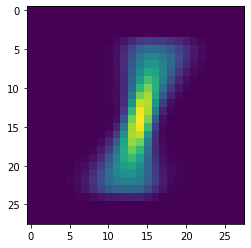

In [738]:
## Calculate the mean image (Object image) of all 1 using PCA for SSD
mean_test=(pca.mean_).reshape(28,28)
plt.imshow(mean_test)
plt.show()

In [0]:
# Calling the SSD function
x=np.zeros((10,10))
x_pca=np.zeros((10,10))
n=0
for i in range(10):
  m=0
  for j in range(10):
    x[i,j]=ssd(num_list[n:n+28,m:m+28],mean_test)
    x_pca[i,j]=ssd(num_list[n:n+28,m:m+28],ssd_final)
    m+=28
  n+=28

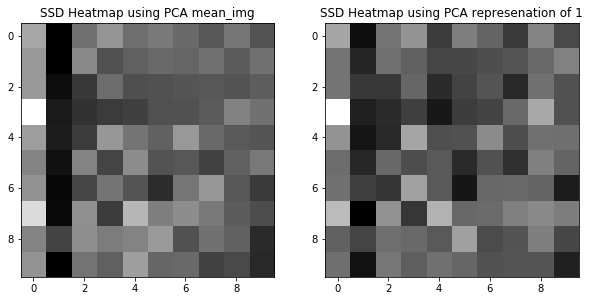

In [740]:
#Poltting SSD Heatmap
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('SSD Heatmap using PCA mean_img')
plt.imshow(x,cmap='gray')
plt.subplot(122)
plt.title('SSD Heatmap using PCA represenation of 1')
plt.imshow(x_pca,cmap='gray')
plt.show()

## 2.c DFFS

In [0]:
#Finding the n principal components on n egienvectors (n=110)
pca_dff= PCA(n_components=110)
pca_train_dff=pca_dff.fit_transform(mnist_pixels_1)
pca_test=pca.transform(mnist_pixels_1_test)
a=pca_dff.components_

In [0]:
#Function to calculate DFFS
def dffs(P,Q):
  sum_dffs=0
  for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
      sum_dffs+=Q[i][j]**2
  #print(sum_dffs)
  diff = P - sum_dffs
  return diff

In [0]:
#Calling DFFS Function
import numpy as np
y=np.zeros((280,280))
y_pca=np.zeros((280,280))
n=0
for i in range(10):
  m=0
  for j in range(10):
    y[n:n+28,m:m+28]=dffs(((num_list[n:n+28,m:m+28]-mean_test)**2).sum(axis=-1).sum(axis=-1),a)
    y_pca[n:n+28,m:m+28]=dffs(((num_list[n:n+28,m:m+28]-ssd_final)**2).sum(axis=-1).sum(axis=-1),a)
    m+=28
  n+=28

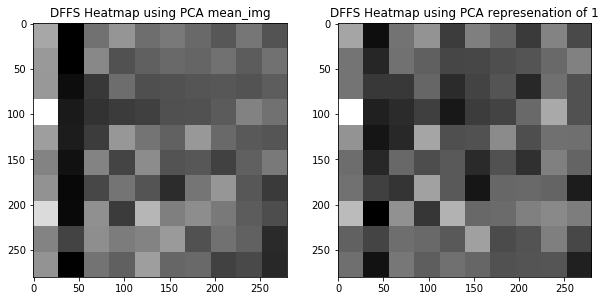

In [744]:
#Plotting DFFs Heatmap
#Poltting SSD Heatmap
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('DFFS Heatmap using PCA mean_img')
plt.imshow(y,cmap='gray')
plt.subplot(122)
plt.title('DFFS Heatmap using PCA represenation of 1')
plt.imshow(y_pca,cmap='gray')
plt.show()

## 2.d Evaluate the performance of SSD and DFFS (i.e. illustrate when it works, and when it does not work).

Answer : As per my observation SSD and DFFS provide similar results. Although they provide better results for images of 0,1 and 9. They quite well detect 7 and 3  when compared to 4,6 and 8. But they seem to provide worst results for 2 and 5.

Additionally, I also observed that mean image of PCA components gives better result when compared to the PCA represenation of any number. To validate my point I have displayed above the results for SSD and DFFS both using pca mean image as well as pca represenation of a number.

To prove my observations I have performed SSD and DFFS on 2 using both pca mean image and pca represenation of 2. We see that both the scenarios fail to detect 2 properly. 


In [0]:
#Extracting all 2 from training data set
mnist_pixels_2=pixels_train[mnist_df_train['label']==2]
#Extracting all 2 from testing data set
mnist_pixels_2_test=pixels_test[mnist_df_test['label']==2]

In [0]:
#Take the object image of 2 using PCA for calculating SSD
pca= PCA()
pca_train=pca.fit_transform(mnist_pixels_2)
pca_test=pca.transform(mnist_pixels_2_test)
principalComponents=pca.components_
ssd_final=principalComponents[1].reshape(28,28)

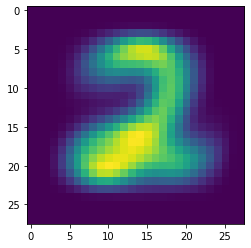

In [747]:
## Calculate the mean image (Object image) of all 2 using PCA for SSD
mean_test=(pca.mean_).reshape(28,28)
plt.imshow(mean_test)
plt.show()

In [0]:
# Calling the SSD function
x=np.zeros((10,10))
x_pca=np.zeros((10,10))
n=0
for i in range(10):
  m=0
  for j in range(10):
    x[i,j]=ssd(num_list[n:n+28,m:m+28],mean_test)
    x_pca[i,j]=ssd(num_list[n:n+28,m:m+28],ssd_final)
    m+=28
  n+=28

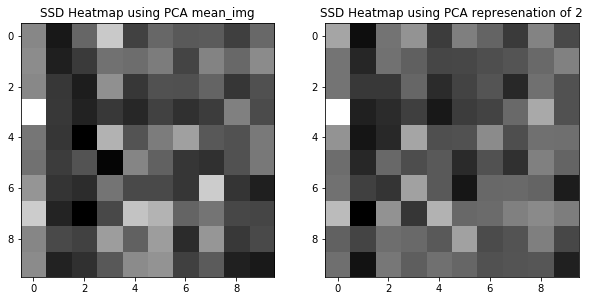

In [749]:
#Poltting SSD Heatmap
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('SSD Heatmap using PCA mean_img')
plt.imshow(x,cmap='gray')
plt.subplot(122)
plt.title('SSD Heatmap using PCA represenation of 2')
plt.imshow(x_pca,cmap='gray')
plt.show()

In [0]:
#Finding the n principal components on n egienvectors (n=110)
pca_dff= PCA(n_components=110)
pca_train_dff=pca_dff.fit_transform(mnist_pixels_2)
pca_test=pca.transform(mnist_pixels_2_test)
a=pca_dff.components_

In [0]:
#Calling DFFS Function
import numpy as np
y=np.zeros((280,280))
y_pca=np.zeros((280,280))
n=0
for i in range(10):
  m=0
  for j in range(10):
    y[n:n+28,m:m+28]=dffs(((num_list[n:n+28,m:m+28]-mean_test)**2).sum(axis=-1).sum(axis=-1),a)
    y_pca[n:n+28,m:m+28]=dffs(((num_list[n:n+28,m:m+28]-ssd_final)**2).sum(axis=-1).sum(axis=-1),a)
    m+=28
  n+=28

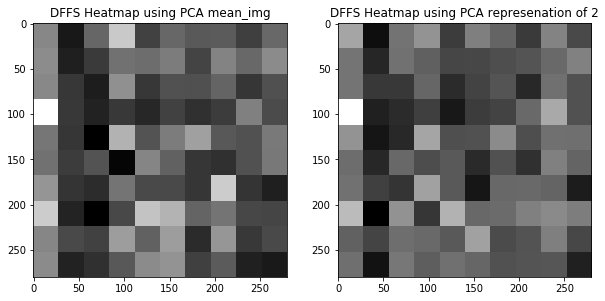

In [752]:
#Plotting DFFs Heatmap
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('DFFS Heatmap using PCA mean_img')
plt.imshow(y,cmap='gray')
plt.subplot(122)
plt.title('DFFS Heatmap using PCA represenation of 2')
plt.imshow(y_pca,cmap='gray')
plt.show()

## Acknowledgement / References :
1. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
2. https://stackoverflow.com/questions/52767317/how-to-convert-rgb-image-pixels-to-lab
3. http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf
4. https://www.science-emergence.com/Articles/How-to-create-a-2d-histogram-with-matplotlib-/
5. https://pysource.com/2018/03/30/histogram-and-back-projection-opencv-3-4-with-python-3-tutorial-28/
6.  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html
7. https://stackoverflow.com/questions/2284611/sum-of-square-differences-ssd-in-numpy-scipy
8. http://doras.dcu.ie/285/1/lncs_3212.pdf
9. https://www.kaggle.com/oddrationale/mnist-in-csv

